<a href="https://colab.research.google.com/github/OlegDenisenko/Data-analyst-Step1k/blob/main/2_A%D0%BDa%D0%BBu%D1%82u%D0%BA_%D0%B4a%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D0%BF_St%D0%B5%D1%80uk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задачи**
*

1.   Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику. 
2.    Какой клиент совершил больше всего успешных операций? (success == True)
3.    С какой платформы осуществляется наибольшее количество успешных операций?
4.    Какую платформу предпочитают премиальные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6.Постройте график распределения числа успешных операций
7.Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций).

Клиенты какого возраста совершили наибольшее количество успешных действий?

In [ ]:
import pandas as pd
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')#, sep = ';'
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')#, sep = ';'

In [ ]:
user_data.head(2)


,client,premium,age
0,46346,False,58
1,4391,False,55


In [ ]:
logs.head(2)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658


Какой клиент совершил больше всего успешных операций?
Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.

In [ ]:
success_number = logs.query('success == True')\
                .groupby('client', as_index = False)\
                .agg({'platform' : 'count'})\
                .rename(columns={'platform': 'success_num'})\
                .sort_values('success_num', ascending = False)#

In [ ]:
max_success = success_number.success_num.max()

In [ ]:
max_success

41

In [ ]:
success_clients = success_number.query('success_num == @max_success').sort_values('client').client.to_list()#

In [ ]:
success_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
', '.join([str(client) for client in success_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

С какой платформы было совершено наибольшее количество успешных операций?

In [47]:
logs.query('success == True').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

Какую платформу предпочитают премиальные клиенты?

In [66]:
data = user_data.merge(logs)

In [67]:
data.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [69]:
import seaborn as sns

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


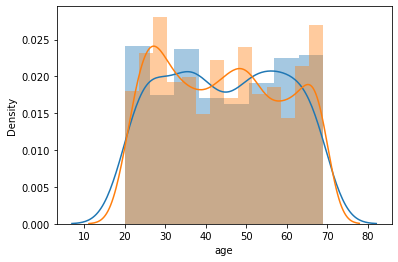

In [71]:
sns.distplot(data.query('premium == True').age)
sns.distplot(data.query('premium == False').age)

In [74]:
client_success = logs.groupby('client') \
  .agg({'success': 'sum'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


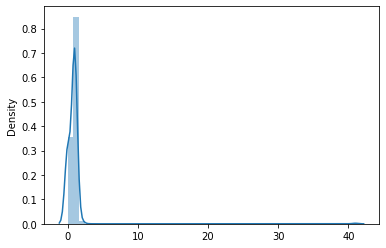

In [75]:
sns.distplot(client_success)

Чтобы повнимательнее посмотреть на распределение Делаем дополнительный запрос

In [76]:
client_success.success.value_counts()

1     2791
0     1166
2       43
41       9
3        1
40       1
Name: success, dtype: int64

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. 

In [79]:
computer_success = data.query('platform == "computer" and success == True')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


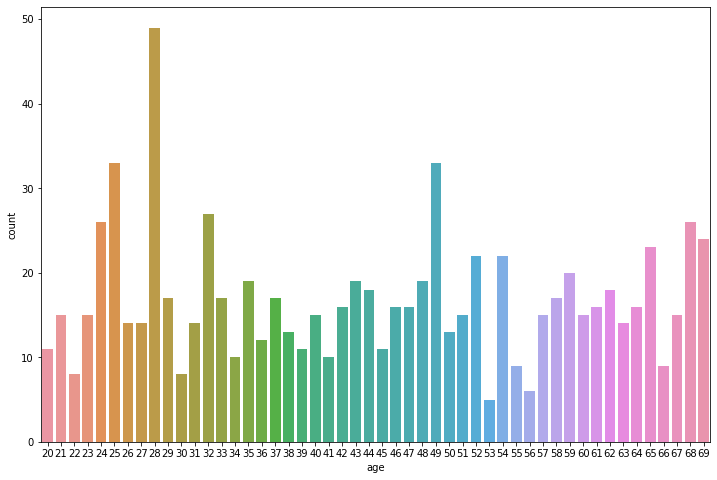

In [83]:
plt.figure(figsize=(12, 8))
sns.countplot(computer_success.age)

Загрузите датасет, используя ; в качестве разделителя. Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.

In [ ]:
import pandas as pd
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', parse_dates=['start_at', 'end_at', 'arrived_at'], sep = ';')
taxi.head(3)
#столбцы , ,  нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi


,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN


In [ ]:
k=taxi.source.value_counts(normalize=True).mul(100)
k

iPhone     42.374282
web        33.195580
Android    21.354620
iPad        2.483905
Wap         0.591613
Name: source, dtype: float64

Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
1.   Посчитайте частоту встречаемости каждой из оценок
2.   Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2)). Сбросьте индексы
3.Переименуйте колонки в driver_score и percentage
4.Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
5.Запишите результат в driver_score_counts


In [ ]:
driver_score_counts = taxi.driver_score\
  .value_counts(normalize=True)\
  .mul(100).round(2).reset_index()\
  .rename(columns = {'index': 'driver_score', 'driver_score': 'percentage'})\
  .sort_values('driver_score')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

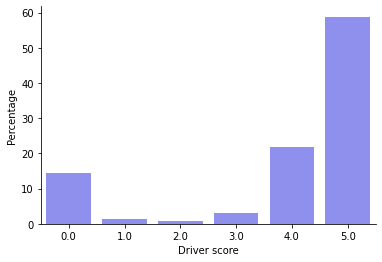

In [ ]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. 

In [ ]:
rider_score_counts = taxi.rider_score\
  .value_counts(normalize=True)\
  .mul(100).round(2).reset_index()\
  .rename(columns = {'index': 'rider_score', 'rider_score': 'percentage'})\
  .sort_values('rider_score')

In [ ]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


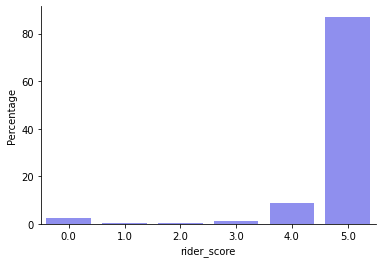

In [ ]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='rider_score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()